In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/stechoq')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, horizontal_flip = True, validation_split=0.3)
# train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, horizontal_flip = True, validation_split=0.3)
# validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = datagen.flow_from_directory(
        '/content/drive/My Drive/stechoq/',
        classes = ['ha', 'na', 'ca','ra', 'ka','da','ta','sa','wa','la','pa','dha','ja','ya','nya','ma','ga','ba','tha','nga'],
        target_size=(224, 224),
        subset='training',
        batch_size=32,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        '/content/drive/My Drive/stechoq/',
        classes = ['ha', 'na', 'ca','ra', 'ka','da','ta','sa','wa','la','pa','dha','ja','ya','nya','ma','ga','ba','tha','nga'],
        target_size=(224, 224),
        subset='validation',
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 1104 images belonging to 20 classes.
Found 457 images belonging to 20 classes.


In [3]:
print("ha: ", len(os.listdir('/content/drive/My Drive/stechoq/ha')))
print("na: ", len(os.listdir('/content/drive/My Drive/stechoq/na')))
print("ca: ", len(os.listdir('/content/drive/My Drive/stechoq/ca')))
print("ra: ", len(os.listdir('/content/drive/My Drive/stechoq/ra')))
print("ka: ", len(os.listdir('/content/drive/My Drive/stechoq/ka')))
print("da: ", len(os.listdir('/content/drive/My Drive/stechoq/da')))
print("ta: ", len(os.listdir('/content/drive/My Drive/stechoq/ta')))
print("sa: ", len(os.listdir('/content/drive/My Drive/stechoq/sa')))
print("wa: ", len(os.listdir('/content/drive/My Drive/stechoq/wa')))
print("la: ", len(os.listdir('/content/drive/My Drive/stechoq/la')))
print("pa: ", len(os.listdir('/content/drive/My Drive/stechoq/pa')))
print("dha: ", len(os.listdir('/content/drive/My Drive/stechoq/dha')))
print("ja: ", len(os.listdir('/content/drive/My Drive/stechoq/ja')))
print("ya: ", len(os.listdir('/content/drive/My Drive/stechoq/ya')))
print("nya: ", len(os.listdir('/content/drive/My Drive/stechoq/nya')))
print("ma: ", len(os.listdir('/content/drive/My Drive/stechoq/ma')))
print("ga: ", len(os.listdir('/content/drive/My Drive/stechoq/ga')))
print("ba: ", len(os.listdir('/content/drive/My Drive/stechoq/ba')))
print("tha: ", len(os.listdir('/content/drive/My Drive/stechoq/tha')))
print("nga: ", len(os.listdir('/content/drive/My Drive/stechoq/nga')))


ha:  78
na:  79
ca:  79
ra:  75
ka:  79
da:  79
ta:  76
sa:  79
wa:  79
la:  78
pa:  77
dha:  77
ja:  78
ya:  79
nya:  78
ma:  79
ga:  78
ba:  79
tha:  76
nga:  79


In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 10
batch_size = 16

base_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in base_model.layers[:15]:
    layer.trainable = False

for layer in base_model.layers[15:]:
    layer.trainable = True
    
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(20, activation='softmax')(x)

model = Model(base_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
35/35 [==============================] - 459s 13s/step - loss: 3.0937 - accuracy: 0.0534 - val_loss: 2.9249 - val_accuracy: 0.1007
Epoch 2/10
35/35 [==============================] - 21s 615ms/step - loss: 2.9262 - accuracy: 0.0978 - val_loss: 2.7170 - val_accuracy: 0.2144
Epoch 3/10
35/35 [==============================] - 21s 605ms/step - loss: 2.6589 - accuracy: 0.1685 - val_loss: 2.3843 - val_accuracy: 0.2801
Epoch 4/10
35/35 [==============================] - 21s 611ms/step - loss: 2.2386 - accuracy: 0.2745 - val_loss: 1.9203 - val_accuracy: 0.3961
Epoch 5/10
35/35 [==============================] - 21s 609ms/step - loss: 1.8149 - accuracy: 0.4031 - val_loss: 1.2873 - val_accuracy: 0.6280
Epoch 6/10
35/35 [==============================] - 21s 603ms/step - loss: 1.4415 - accuracy: 0.5145 - val_loss: 1.0087 - val_accuracy: 0.6696
Epoch 7/10
35/35 [==============================] - 22s 615ms/step - loss: 1.1968 - accuracy: 0.5915 - val_loss: 0.9676 - val_accuracy: 0.6783


In [6]:
model.evaluate(validation_generator)

15/15 [==============================] - 6s 391ms/step - loss: 0.5744 - accuracy: 0.8140


[0.5744034051895142, 0.8140043616294861]

In [7]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

15/15 [==============================] - 6s 400ms/step


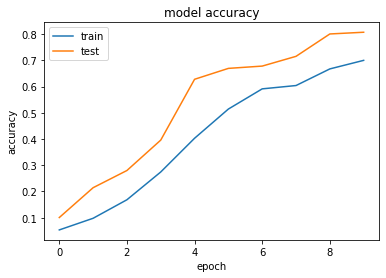

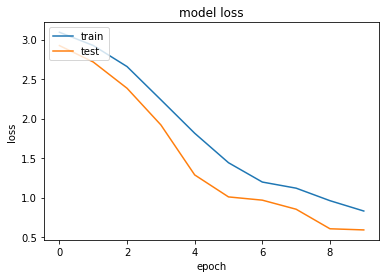

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving Screenshot 2022-01-19 180346.png to Screenshot 2022-01-19 180346.png
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5439249e-30
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8224615e-22
 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
ga


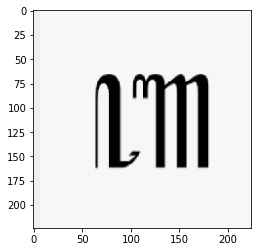

In [11]:
label = ['ha', 'na', 'ca','ra', 'ka','da','ta','sa','wa','la','pa','dha','ja','ya','nya','ma','ga','ba','tha','nga']

%matplotlib inline
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(label[np.argmax(classes[0])])

In [12]:
import tensorflow as tf
from tensorflow import keras
keras_file = "vgg16.h5"
keras.models.save_model(model, keras_file)

In [13]:
keras_model = tf.keras.models.load_model("/content/drive/My Drive/stechoq/vgg16.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpae15uyqk/assets
